# Odd-Even MPI Weak Scaling Anaylisis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("/scratch/user/vlobello/CSCE_435/SampleSort_MPI/starter/*.cali"))
tk.dataframe = tk.dataframe.drop(["spot.channel"], axis=1)
tk.dataframe = tk.dataframe.drop(["Min time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total time"],axis=1)
tk.dataframe = tk.dataframe.drop(["Variance time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["nid"],axis=1)

In [3]:
# Performance data
tk.dataframe

Avg time/rank  \
node                                               profile                     
{'name': 'main', 'type': 'function'}               14372139        14.178732   
                                                   29461796       221.646589   
                                                   131830269      146.047015   
                                                   176760667        3.263326   
                                                   267728972       12.458529   
                                                   345756005        1.166517   
                                                   404498829     1048.925896   
                                                   418240614      165.508483   
                                                   425786496      687.190547   
                                                   440845982      649.455986   
                                                   475215333       48.695298   
                                                   491088984       21.733016   
                                                   568565920      164.336832   
                                                   694987602        2.818375   
                                                   778667940      212.192730   
                                                   795795271       38.611411   
                                                   838336307        1.052558   
                                                   905154260        2.747368   
                                                   969574919       44.539958   
                                                   1012078945      10.337656   
                                                   1042416677     401.757283   
                                                   1048280051      11.617419   
                                                   1051296460       3.124923   
                                                   1060084927      13.101508   
                                                   1062089792      87.598184   
                                                   1067937906      41.114077   
                                                   1083777029     255.625046   
                                                   1116103140     190.580664   
                                                   1124532217      23.047051   
                                                   1267601982      10.464894   
                                                   1277860420       2.237769   
                                                   1328196166      14.430960   
                                                   1395472595     231.382848   
                                                   1410872313      36.475646   
                                                   1464601753      29.395661   
                                                   1482208354       9.605409   
                                                   1568809456       3.044493   
                                                   1572200854      36.797332   
                                                   1579732978       2.815599   
                                                   1586941584      40.822606   
                                                   1616135986       3.255314   
                                                   1621811167     332.657544   
                                                   1666139189     417.688458   
                                                   1733482712     342.559607   
                                                   1764253775       6.761910   
                                                   1814343942     158.928661   
                                                   1826634934      16.301013   
                                                   1836025196      21.199605   
                                                   1838848380  

In [4]:
#Printing Thicket Tree
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comp
│  ├─ 1.000 comm
│  │  ├─ 1.000 comm_large
│  │  │  └─ 1.000 Gatherv
│  │  ├─ 1.000 comm_small
│  │  │  ├─ 1.000 Allgather
│  │  │  └─ 1.000 Gather
│  │  ├─ 1.000 comp_large
│  │  └─ 1.000 comp_small
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_initialization

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [5]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
14372139,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a262144-p16-i1.cali,true,1701396445,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 262144, 1, 16]",c,SampleSort,MPI,int,4,262144,Sorted,16,9,Online
29461796,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a4194304-p512-i2.cali,true,1701400269,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 4194304, 2, 512]",c,SampleSort,MPI,int,4,4194304,Reverse Sorted,512,9,Online
131830269,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a262144-p2-i1.cali,true,1701396405,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 262144, 1, 2]",c,SampleSort,MPI,int,4,262144,Sorted,2,9,Online
176760667,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a65536-p4-i3.cali,true,1701395889,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 65536, 3, 4]",c,SampleSort,MPI,int,4,65536,,4,9,Online
267728972,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a262144-p64-i2.cali,true,1701396517,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 262144, 2, 64]",c,SampleSort,MPI,int,4,262144,Reverse Sorted,64,9,Online
345756005,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a1048576-p2-i0.cali,true,1701396873,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 1048576, 0, 2]",c,SampleSort,MPI,int,4,1048576,Randomized,2,9,Online
404498829,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a4194304-p64-i3.cali,true,1701398434,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 4194304, 3, 64]",c,SampleSort,MPI,int,4,4194304,,64,9,Online
418240614,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a1048576-p16-i1.cali,true,1701396994,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 1048576, 1, 16]",c,SampleSort,MPI,int,4,1048576,Sorted,16,9,Online
425786496,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,a4194304-p64-i1.cali,true,1701398421,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 4194304, 1, 64]",c,SampleSort,MPI,int,4,4194304,Sorted,64,9,Online


In [6]:
gb = tk.groupby(["InputType", "InputSize"])

17  thickets created...
{('', 65536): <thicket.thicket.Thicket object at 0x2b4e626a4fd0>, ('', 262144): <thicket.thicket.Thicket object at 0x2b4e62932100>, ('', 1048576): <thicket.thicket.Thicket object at 0x2b4e628ae100>, ('', 4194304): <thicket.thicket.Thicket object at 0x2b4e62890f10>, ('Randomized', 65536): <thicket.thicket.Thicket object at 0x2b4e628c75b0>, ('Randomized', 262144): <thicket.thicket.Thicket object at 0x2b4e627c04f0>, ('Randomized', 1048576): <thicket.thicket.Thicket object at 0x2b4e62898bb0>, ('Randomized', 4194304): <thicket.thicket.Thicket object at 0x2b4e6273fee0>, ('Randomized', 16777216): <thicket.thicket.Thicket object at 0x2b4e627a8d60>, ('Reverse Sorted', 65536): <thicket.thicket.Thicket object at 0x2b4e62821bb0>, ('Reverse Sorted', 262144): <thicket.thicket.Thicket object at 0x2b4e62732730>, ('Reverse Sorted', 1048576): <thicket.thicket.Thicket object at 0x2b4e629a2190>, ('Reverse Sorted', 4194304): <thicket.thicket.Thicket object at 0x2b4e629f3970>, ('Sort

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [8]:
ctk.dataframe

(, 65536)  \
                                                             Avg time/rank   
node                                               num_procs                 
{'name': 'main', 'type': 'function'}               2              2.237769   
                                                   4              3.263326   
                                                   8              2.818375   
                                                   16             6.316774   
                                                   32            20.979793   
                                                   64             9.605409   
                                                   128           31.014782   
                                                   256                 NaN   
                                                   512                 NaN   
{'name': 'comp', 'type': 'function'}               2              0.879603   
                                                   4              1.414738   
                                                   8              1.362839   
                                                   16             3.478957   
                                                   32            13.843760   
                                                   64             0.470242   
                                                   128            1.694739   
                                                   256                 NaN   
                                                   512                 NaN   
{'name': 'comm', 'type': 'function'}               2              0.059770   
                                                   4              0.245421   
                                                   8              0.737670   
                                                   16             3.159500   
                                                   32            13.710133   
                                                   64             0.454631   
                                                   128            1.692168   
                                                   256                 NaN   
                                                   512                 NaN   
{'name': 'comm_large', 'type': 'function'}         2              0.033539   
                                                   4              0.141001   
                                                   8              0.369994   
                                                   16             1.359961   
                                                   32             3.774061   
                                                   64             0.094140   
                                                   128            0.333734   
                                                   256                 NaN   
                                                   512                 NaN   
{'name': 'Gatherv', 'type': 'function'}            2              0.033521   
                                                   4              0.140982   
                                                   8              0.369977   
                                                   16             1.359937   
                                                   32             3.774033   
                                                   64             0.094121   
                                                   128            0.333704   
                                                   256                 NaN   
                                                   512                 NaN   
{'name': 'comm_small', 'type': 'function'}         2              0.023887   
                                                   4              0.102733   
                                                   8              0.365862   
                                                   16             1.793840   
         

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
# Drop unwanted columns
#ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (("1%%perturbed",65536), "nid"), (("1%%perturbed",65536),"Min time/rank"), (("1%%perturbed",65536),"Max time/rank"), (("1%%perturbed",65536),"Total time"), (("1%%perturbed",65536),"Variance time/rank"), (("Random",65536),"nid"), (("Random",65536),"Min time/rank"), (("Random",65536),"Max time/rank"), (("Random",65536),"Total time"), (("Random",65536),"Variance time/rank"),(("Sorted",65536),"nid"),(("Sorted",65536),"Min time/rank"), (("Sorted",65536),"Max time/rank"), (("Sorted",65536),"Total time"), (("Sorted",65536),"Variance time/rank"),(("ReverseSorted",65536),"nid"),(("ReverseSorted",65536),"Min time/rank"), (("ReverseSorted",65536),"Max time/rank"), (("ReverseSorted",65536),"Total time"), (("ReverseSorted",65536),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",262144), "nid"), (("1%%perturbed",262144),"Min time/rank"), (("1%%perturbed",262144),"Max time/rank"), (("1%%perturbed",262144),"Total time"), (("1%%perturbed",262144),"Variance time/rank"), (("Random",262144),"nid"), (("Random",262144),"Min time/rank"), (("Random",262144),"Max time/rank"), (("Random",262144),"Total time"), (("Random",262144),"Variance time/rank"),(("Sorted",262144),"nid"),(("Sorted",262144),"Min time/rank"), (("Sorted",262144),"Max time/rank"), (("Sorted",262144),"Total time"), (("Sorted",262144),"Variance time/rank"),(("ReverseSorted",262144),"nid"),(("ReverseSorted",262144),"Min time/rank"), (("ReverseSorted",262144),"Max time/rank"), (("ReverseSorted",262144),"Total time"), (("ReverseSorted",262144),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",1048576), "nid"), (("1%%perturbed",1048576),"Min time/rank"), (("1%%perturbed",1048576),"Max time/rank"), (("1%%perturbed",1048576),"Total time"), (("1%%perturbed",1048576),"Variance time/rank"), (("Random",1048576),"nid"), (("Random",1048576),"Min time/rank"), (("Random",1048576),"Max time/rank"), (("Random",1048576),"Total time"), (("Random",1048576),"Variance time/rank"),(("Sorted",1048576),"nid"),(("Sorted",1048576),"Min time/rank"), (("Sorted",1048576),"Max time/rank"), (("Sorted",1048576),"Total time"), (("Sorted",1048576),"Variance time/rank"),(("ReverseSorted",1048576),"nid"),(("ReverseSorted",1048576),"Min time/rank"), (("ReverseSorted",1048576),"Max time/rank"), (("ReverseSorted",1048576),"Total time"), (("ReverseSorted",1048576),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.drop([("index","")], axis=1)

ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [10]:
ctk.dataframe

(, 65536)    (, 262144)   (, 1048576)  \
                              Avg time/rank Avg time/rank Avg time/rank   
name                num_procs                                             
main                2              2.237769     36.475646    476.475340   
                    4              3.263326     67.451522           NaN   
                    8              2.818375     13.993827    190.580664   
                    16             6.316774     12.487122    100.788485   
                    32            20.979793     24.490396     99.573385   
                    64             9.605409     13.056067     58.439869   
                    128           31.014782     23.045116     48.695298   
                    256                 NaN           NaN     76.710375   
                    512                 NaN           NaN           NaN   
comp                2              0.879603      3.196848    238.540466   
                    4              1.414738     25.179902           NaN   
                    8              1.362839     10.351794    145.210703   
                    16             3.478957      8.971188     89.149216   
                    32            13.843760     18.364395     61.410046   
                    64             0.470242      2.138372     25.637389   
                    128            1.694739      2.730873     16.474612   
                    256                 NaN           NaN     17.781587   
                    512                 NaN           NaN           NaN   
comm                2              0.059770      0.061160      0.133959   
                    4              0.245421      0.268846           NaN   
                    8              0.737670      0.693414      1.015781   
                    16             3.159500      3.559204      3.695133   
                    32            13.710133     15.557816     15.023851   
                    64             0.454631      0.800827      2.116456   
                    128            1.692168      2.193315      4.790372   
                    256                 NaN           NaN     12.296570   
                    512                 NaN           NaN           NaN   
comm_large          2              0.033539      0.027989      0.030474   
                    4              0.141001      0.119908           NaN   
                    8              0.369994      0.339494      0.438499   
                    16             1.359961      1.424367      1.411714   
                    32             3.774061      5.638447      4.121839   
                    64             0.094140      0.149606      0.226905   
                    128            0.333734      0.585351      0.642108   
                    256                 NaN           NaN      3.233274   
                    512                 NaN           NaN           NaN   
Gatherv             2              0.033521      0.027962      0.030444   
                    4              0.140982      0.119889           NaN   
                    8              0.369977      0.339475      0.438470   
                    16             1.359937      1.424338      1.411683   
                    32             3.774033      5.638419      4.121808   
                    64             0.094121      0.149586      0.226877   
                    128            0.333704      0.585326      0.642078   
                    256                 NaN           NaN      3.233247   
                    512                 NaN           NaN           NaN   
comm_small          2              0.023887      0.019391      0.031678   
                    4              0.102733      0.128759           NaN   
                    8              0.365862      0.326294      0.445596   
                    16             1.793840      2.102292      2.052510   
                    32             9.933439      9.854399     10.477458   
                    64             0.356245      0.547232  

In [11]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
inputsizes = sorted(list(set(tk.metadata["InputSize"].to_list())))
inputtypes = sorted(list(set(tk.metadata["InputType"].to_list())))

In [12]:
ctk.dataframe

(, 65536)    (, 262144)   (, 1048576)  \
                              Avg time/rank Avg time/rank Avg time/rank   
name                num_procs                                             
main                2              2.237769     36.475646    476.475340   
                    4              3.263326     67.451522           NaN   
                    8              2.818375     13.993827    190.580664   
                    16             6.316774     12.487122    100.788485   
                    32            20.979793     24.490396     99.573385   
                    64             9.605409     13.056067     58.439869   
                    128           31.014782     23.045116     48.695298   
                    256                 NaN           NaN     76.710375   
                    512                 NaN           NaN           NaN   
comp                2              0.879603      3.196848    238.540466   
                    4              1.414738     25.179902           NaN   
                    8              1.362839     10.351794    145.210703   
                    16             3.478957      8.971188     89.149216   
                    32            13.843760     18.364395     61.410046   
                    64             0.470242      2.138372     25.637389   
                    128            1.694739      2.730873     16.474612   
                    256                 NaN           NaN     17.781587   
                    512                 NaN           NaN           NaN   
comm                2              0.059770      0.061160      0.133959   
                    4              0.245421      0.268846           NaN   
                    8              0.737670      0.693414      1.015781   
                    16             3.159500      3.559204      3.695133   
                    32            13.710133     15.557816     15.023851   
                    64             0.454631      0.800827      2.116456   
                    128            1.692168      2.193315      4.790372   
                    256                 NaN           NaN     12.296570   
                    512                 NaN           NaN           NaN   
comm_large          2              0.033539      0.027989      0.030474   
                    4              0.141001      0.119908           NaN   
                    8              0.369994      0.339494      0.438499   
                    16             1.359961      1.424367      1.411714   
                    32             3.774061      5.638447      4.121839   
                    64             0.094140      0.149606      0.226905   
                    128            0.333734      0.585351      0.642108   
                    256                 NaN           NaN      3.233274   
                    512                 NaN           NaN           NaN   
Gatherv             2              0.033521      0.027962      0.030444   
                    4              0.140982      0.119889           NaN   
                    8              0.369977      0.339475      0.438470   
                    16             1.359937      1.424338      1.411683   
                    32             3.774033      5.638419      4.121808   
                    64             0.094121      0.149586      0.226877   
                    128            0.333704      0.585326      0.642078   
                    256                 NaN           NaN      3.233247   
                    512                 NaN           NaN           NaN   
comm_small          2              0.023887      0.019391      0.031678   
                    4              0.102733      0.128759           NaN   
                    8              0.365862      0.326294      0.445596   
                    16             1.793840      2.102292      2.052510   
                    32             9.933439      9.854399     10.477458   
                    64             0.356245      0.547232  

# Plotting (From the lab 1 example)

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [13]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    legend = plot.legend(loc='upper center', fontsize='x-small')
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=2)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Graphs

In [15]:
ctk.dataframe.loc["main"]

,"(, 65536)","(, 262144)","(, 1048576)","(, 4194304)","(Randomized, 65536)","(Randomized, 262144)","(Randomized, 1048576)","(Randomized, 4194304)","(Randomized, 16777216)","(Reverse Sorted, 65536)","(Reverse Sorted, 262144)","(Reverse Sorted, 1048576)","(Reverse Sorted, 4194304)","(Sorted, 65536)","(Sorted, 262144)","(Sorted, 1048576)","(Sorted, 4194304)"
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,,,,,,,,,,,,,,,
2,2.237769,36.475646,476.475340,NaN,0.528216,46.381312,1.166517,2.747368,12.760863,3.255314,93.175759,NaN,NaN,5.234162,146.047015,NaN,NaN
4,3.263326,67.451522,NaN,NaN,1.052558,1.329610,NaN,4.657263,14.430960,2.443396,39.391971,417.688458,NaN,3.044493,40.822606,NaN,NaN
8,2.818375,13.993827,190.580664,NaN,2.523277,2.498624,NaN,6.078251,16.301013,2.815599,13.101508,NaN,NaN,3.124923,21.375187,NaN,NaN
16,6.316774,12.487122,100.788485,NaN,6.730830,6.521394,NaN,10.464894,29.395661,5.952982,11.008347,158.928661,NaN,6.761910,14.178732,165.508483,NaN
32,20.979793,24.490396,99.573385,NaN,23.554124,22.071801,24.741765,NaN,51.440618,18.263210,21.733016,62.241255,NaN,21.199605,24.947102,100.339375,NaN
64,9.605409,13.056067,58.439869,1048.925896,12.710731,10.337656,12.431095,51.629717,41.114077,12.374643,12.458529,34.371521,649.455986,12.606614,11.617419,44.539958,687.190547
128,31.014782,23.045116,48.695298,401.757283,36.908170,30.960376,32.365399,41.926042,75.585329,30.614819,22.104579,38.611411,212.192730,30.754656,23.047051,36.797332,342.559607
256,NaN,NaN,76.710375,255.625046,NaN,NaN,87.598184,105.480250,NaN,NaN,NaN,67.731492,164.336832,NaN,NaN,63.146716,231.382848


In [16]:
#Weak Scaling

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


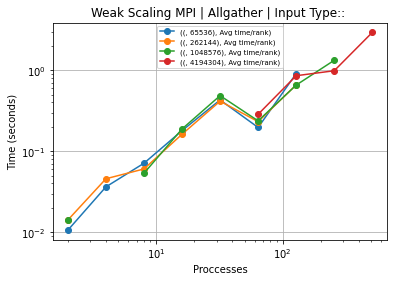

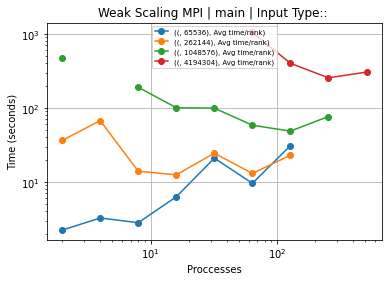

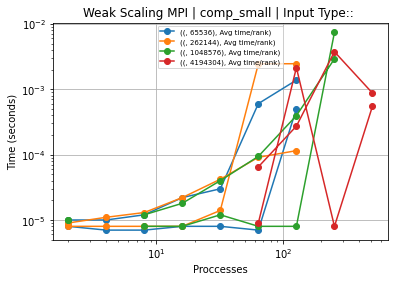

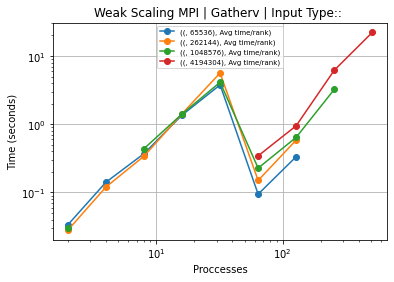

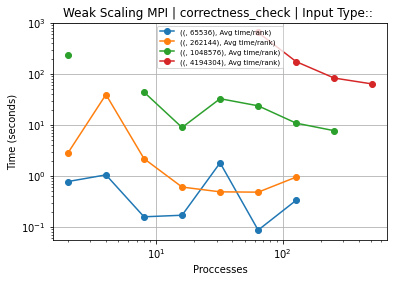

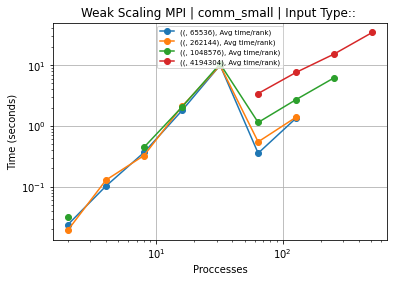

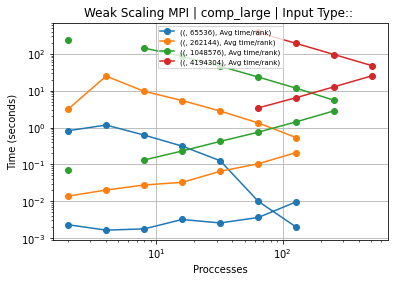

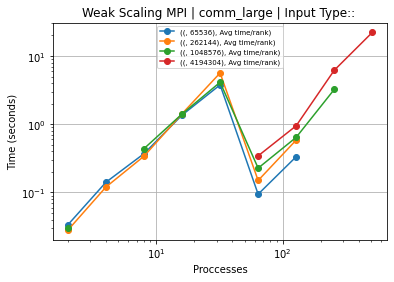

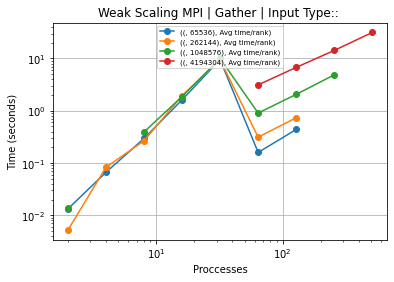

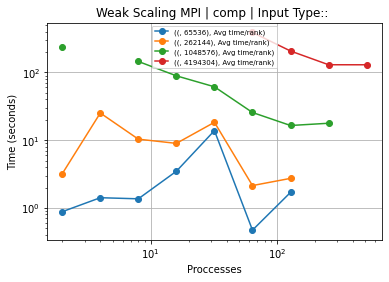

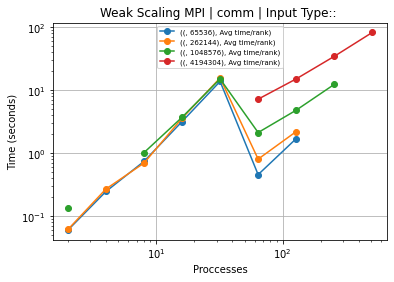

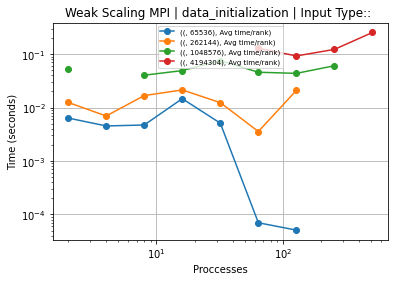

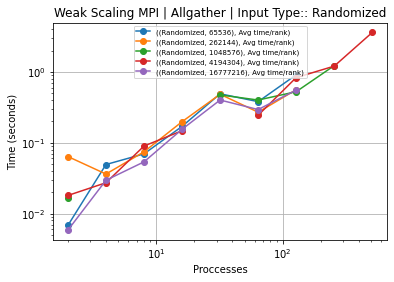

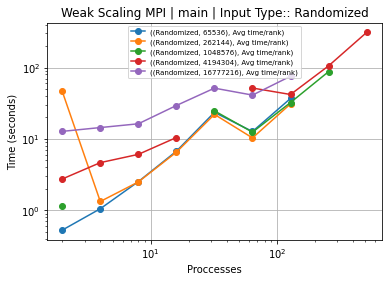

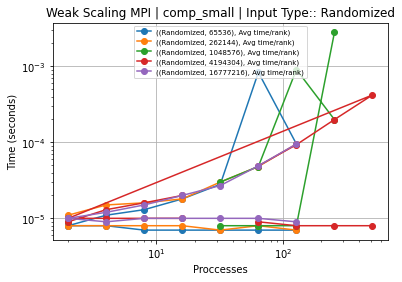

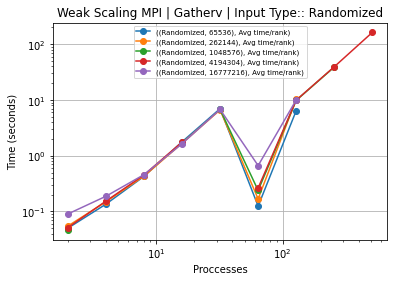

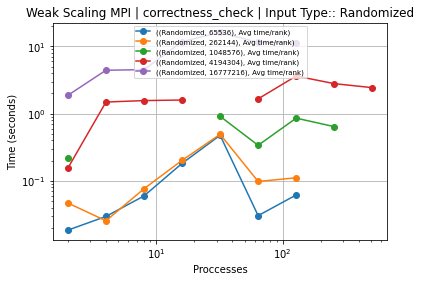

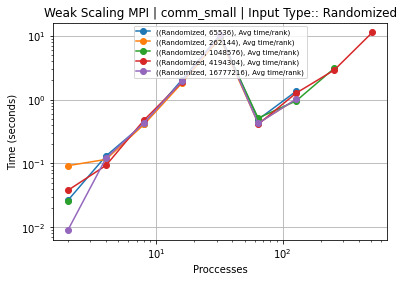

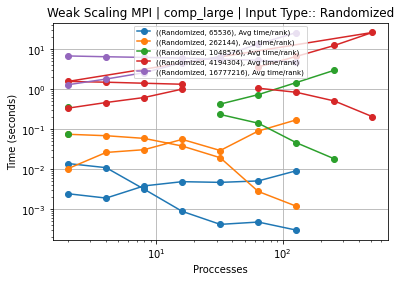

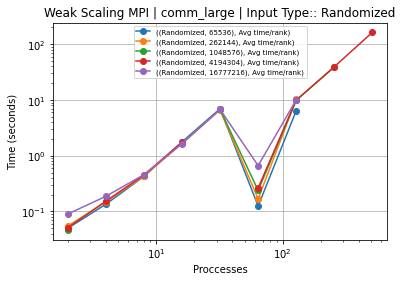

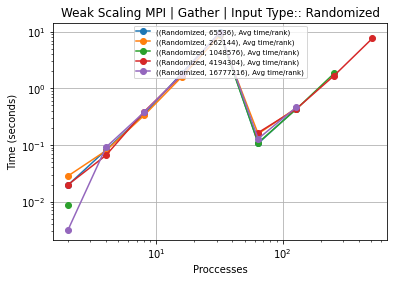

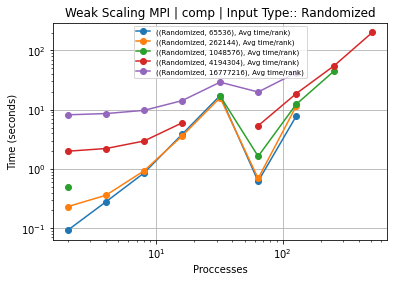

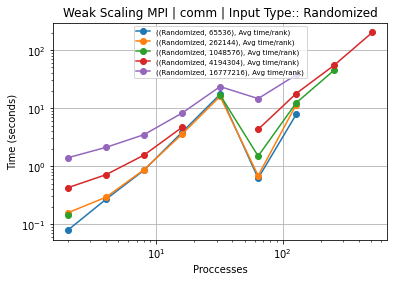

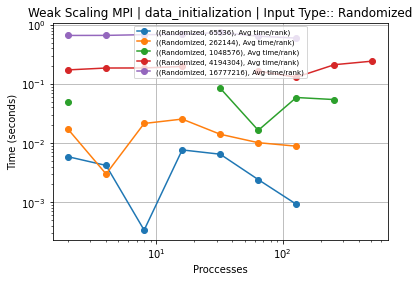

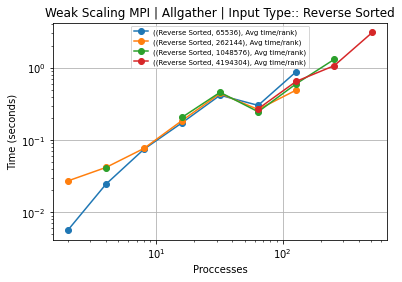

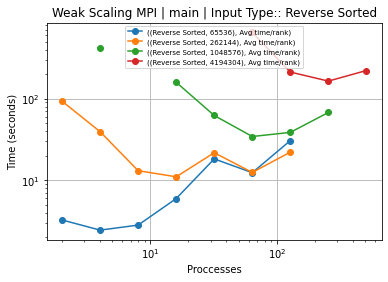

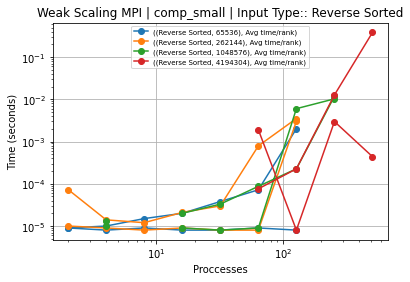

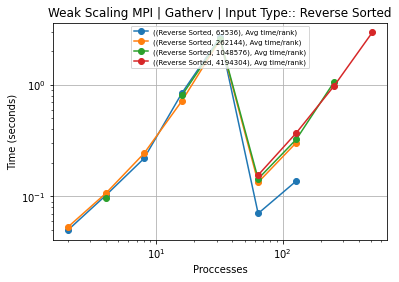

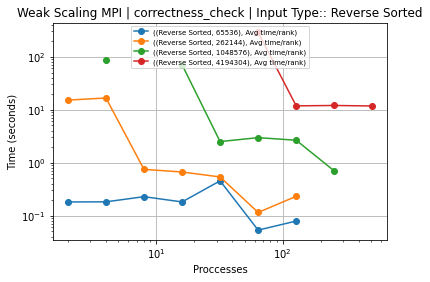

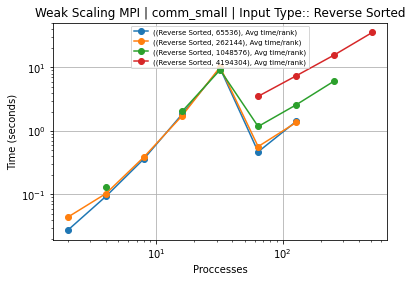

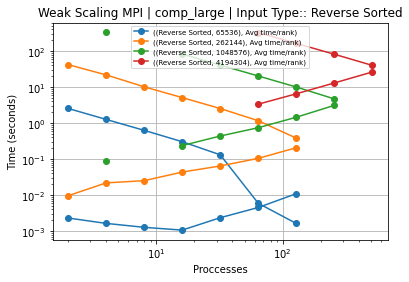

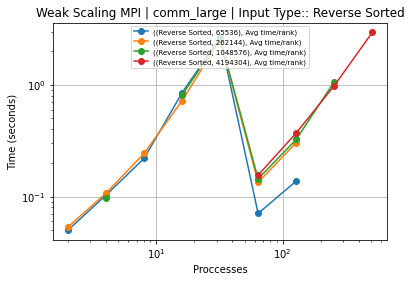

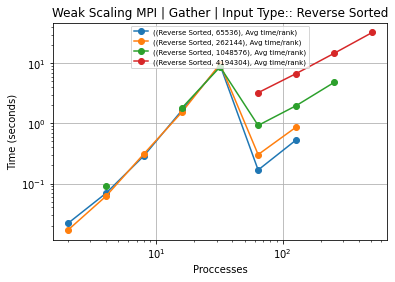

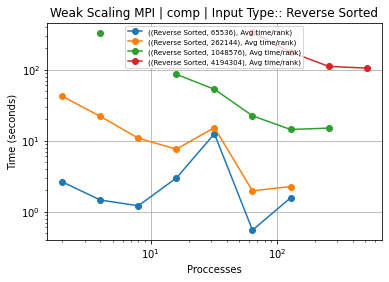

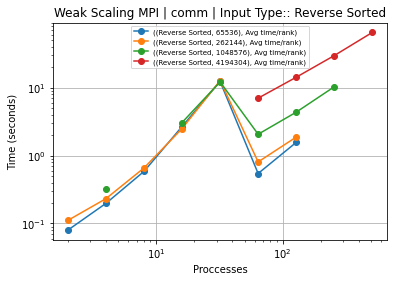

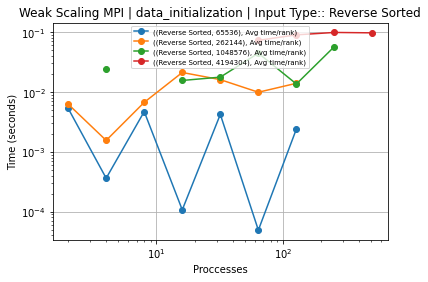

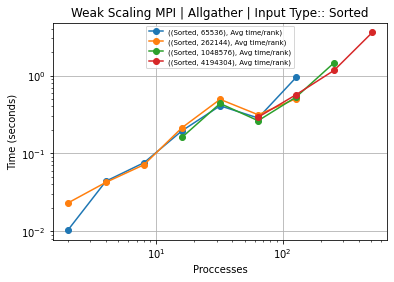

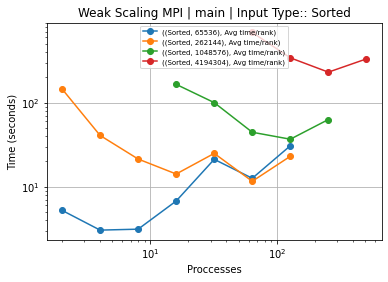

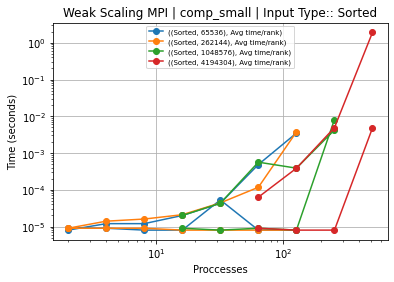

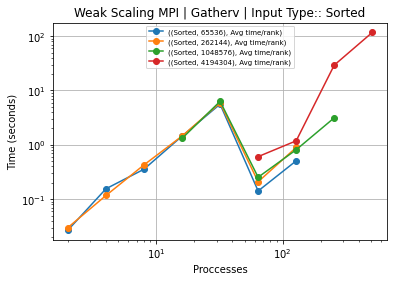

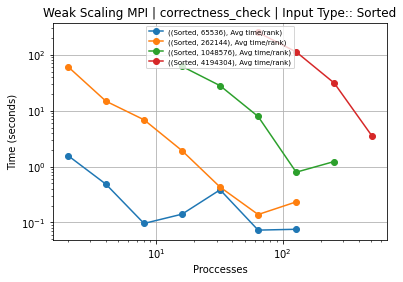

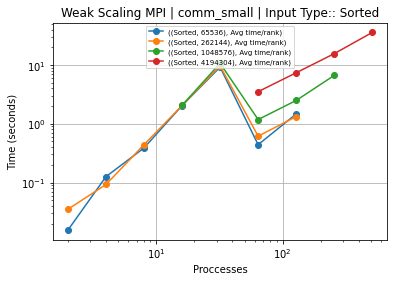

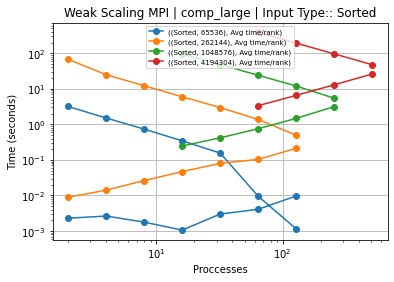

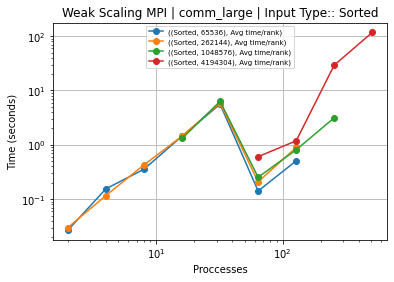

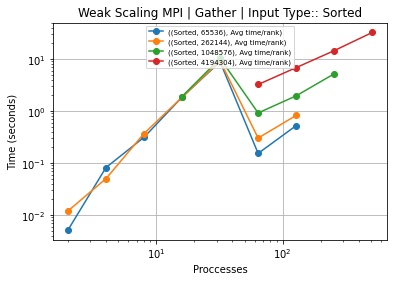

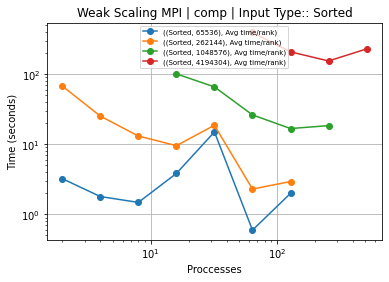

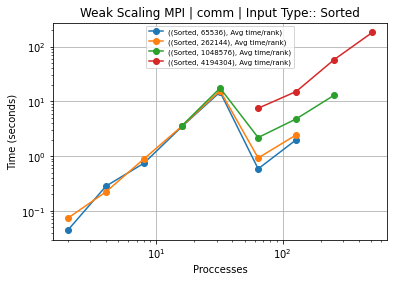

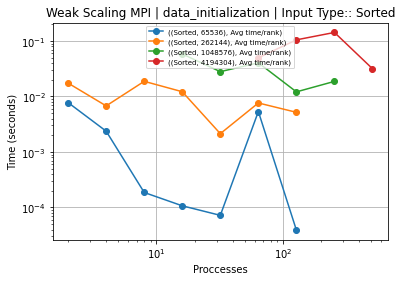

In [17]:
#Plotting Weak Scaling
for intype in inputtypes:
    cols = [(inputsize, "Avg time/rank") for inputsize in ctk.dataframe.columns.get_level_values(0) if inputsize[0] == intype]
    test = ctk.dataframe[cols]
    for name in function_names:
        plot = plot_pandas(
            df=test.loc[name],
            title=f"Weak Scaling MPI | {name} | Input Type:: {intype}",
            xlabel="Proccesses",
            ylabel="Time (seconds)",
            loglog=True
        )
        fig = plot.get_figure()
        fig.savefig(f"Weak_Scaling_MPI_{name}_InputType::{intype}")